In [189]:
# dependencies
import os
import cv2
import numpy as np
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split

In [3]:
# Call VGGFace model
model_name = "Facenet"
model = DeepFace.build_model(model_name)

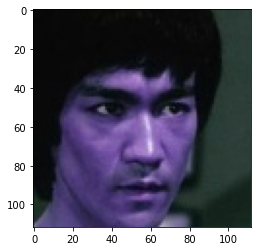

In [4]:
# Split the list to get a subsample of our faces to act as database
#X_train, X_test = train_test_split(all_files, test_size=0.99, random_state=1)
# test_size 0.999 gives a train size of 490 random faces
#print(len(X_train))
#database = X_train

# Validate Images
input_face_name = 'CASIA-WebFace/images/490624/490624_2.jpg'
input_face = cv2.imread(input_face_name)
plt.imshow(input_face)

In [115]:
######################################################
# DATA LOADING
######################################################

# own class to store path separate for intra vs inter class comparison
class facepath: 
    def __init__(self, path, faceno): 
        self.path = path 
        self.faceno = faceno

###############################
# PLAIN FACES
###############################

# how many faces / folders should we use as database
n_faces = 5
n_max_images_per_face = 2

# Load all filenames into a list
path = 'CASIA-WebFace/images/' 
plain_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        plain_faces.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d plain face(s)" % (len(plain_faces), n_faces))
print("Example: %s [%i]" % (plain_faces[0].path, plain_faces[0].faceno))
print("----------------------------------")

###############################
# ENCRYPTED FACES L
###############################

# Load all filenames into a list
path = 'l_w4o6_CASIA-WebFace/images/' 
encrypted_l_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        encrypted_l_faces.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d encrypted layer progression order face(s)" % (len(encrypted_l_faces), n_faces))
print("Example: %s [%i]" % (encrypted_l_faces[0].path, encrypted_l_faces[0].faceno))
print("----------------------------------")

###############################
# ENCRYPTED FACES R
###############################

# Load all filenames into a list
path = 'r_w4o6_CASIA-WebFace/images/' 
encrypted_r_faces = []
    
i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == n_faces+1:
        break
    j = 0
    for name in files:
        
        if j == n_max_images_per_face:
            break  
            
        encrypted_r_faces.append(facepath(str(root) + "/" + (str(name)), i))
        j += 1
        
    i += 1
        
print("loaded %d files from %d encrypted resolution progression order face(s)" % (len(encrypted_r_faces), n_faces))
print("Example: %s [Face: %i]" % (encrypted_r_faces[0].path, encrypted_r_faces[0].faceno))
print("----------------------------------")

loaded 10 files from 5 plain face(s)
Example: CASIA-WebFace/images/490624/490624_1.jpg [1]
----------------------------------
loaded 10 files from 5 encrypted layer progression order face(s)
Example: l_w4o6_CASIA-WebFace/images/490624/490624_10_j2k_l-W4-O6.png [1]
----------------------------------
loaded 10 files from 5 encrypted resolution progression order face(s)
Example: r_w4o6_CASIA-WebFace/images/490624/490624_10_j2k_r-W4-O6.png [Face: 1]
----------------------------------


In [153]:
######################################################
# OWN CLASS TO STORE IMAGE PATHS AND CLASSES
######################################################


class facepath: 
    def __init__(self, path, faceno): 
        self.path = path 
        self.faceno = faceno

######################################################
# INTRA AND INTER CLASS - FACE COMPARISON
######################################################
        
def compare_faces(set_a, set_b, comparison):

    '''
    function: 
        compare two sets of faces with an face recognition algorithm

    input:
        set_a: set of faces containing objects of facepath
        set_b: set of faces containing objects of facepath

    output:
        avg_dist: average distance metric for face comparison

    '''
                  
    # average distance between images
    avg_dist = 0.0


    k = 0

    # iterate over all faces
    for face_a in set_a:

        for face_b in set_b:

            if "intra" in comparison:

                # only compare intra class, not inter
                if face_a.faceno == face_b.faceno:

                    # compare faces
                    result = DeepFace.verify(face_a.path,
                                             face_b.path,
                                             enforce_detection=False,
                                             model_name ="Facenet") 
                    k += 1

                    # compute average face distance
                    avg_dist =  avg_dist + result['distance']
                    
            elif "inter" in comparison:

                # only compare inter class not intra
                if face_a.faceno is not face_b.faceno:

                    # compare faces
                    result = DeepFace.verify(face_a.path,
                                             face_b.path,
                                             enforce_detection=False,
                                             model_name ="Facenet") 

                    k += 1

                    # compute average face distance
                    avg_dist =  avg_dist + result['distance']
    avg_dist = float(avg_dist / k)
                
    return avg_dist

In [162]:
######################################################
# COMPUTING INTER AND INTRA CLASS DISTANCES
######################################################

avg_pp_intra = compare_faces(plain_faces, plain_faces, "intra")
print("Avg. Intra-Class Distance PLAIN VS PLAIN: \t\t%.2f" % avg_pp_intra)

avg_elp_intra = compare_faces(encrypted_l_faces, plain_faces, "intra")
print("Avg. Intra-Class Distance LAYER-ENCRYPTED VS PLAIN: \t%.2f" % avg_elp_intra)

avg_erp_intra = compare_faces(encrypted_r_faces, plain_faces, "intra")
print("Avg. Intra-Class Distance RES_ENCRYPTED VS PLAIN: \t%.2f" % avg_erp_intra)

avg_pp_inter = compare_faces(plain_faces, plain_faces, "inter)")
print("Avg. Inter-Class Distance PLAIN VS PLAIN: \t\t%.2f" % avg_pp_inter)

avg_elp_inter = compare_faces(encrypted_l_faces, plain_faces, "inter")
print("Avg. Inter-Class Distance LAYER-ENCRYPTED VS PLAIN: \t%.2f" % avg_elp_inter)

avg_erp_inter = compare_faces(encrypted_r_faces, plain_faces, "inter")
print("Avg. Inter-Class Distance RES_ENCRYPTED VS PLAIN: \t%.2f" % avg_erp_inter)

Avg. Intra-Class Distance PLAIN VS PLAIN: 		0.28
Avg. Intra-Class Distance LAYER-ENCRYPTED VS PLAIN: 	0.87
Avg. Intra-Class Distance RES_ENCRYPTED VS PLAIN: 	0.75
Avg. Inter-Class Distance PLAIN VS PLAIN: 		0.96
Avg. Inter-Class Distance LAYER-ENCRYPTED VS PLAIN: 	0.87
Avg. Inter-Class Distance RES_ENCRYPTED VS PLAIN: 	0.88


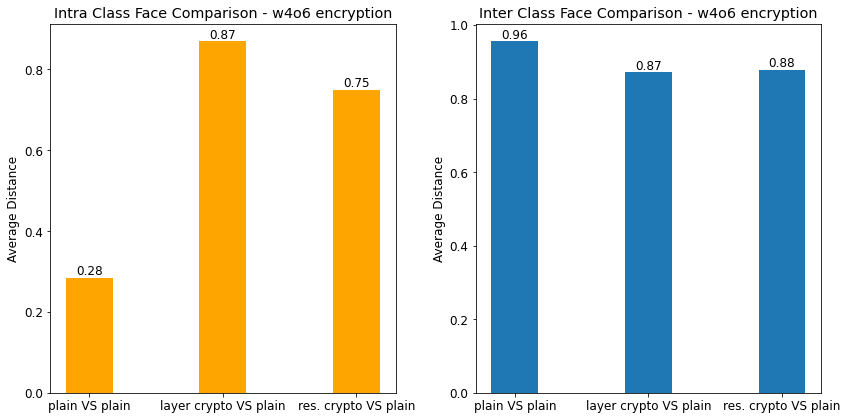

In [200]:
######################################################
# INTRA AND INTER CLASS - FACE COMPARISON - PLOT
######################################################

# Setting font of the Plot
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12
       }

matplotlib.rc('font', **font)


# Lables and Values
labels_intra = ['plain VS plain', 'layer crypto VS plain', 'res. crypto VS plain']
labels_inter = ['plain VS plain', 'layer crypto VS plain', 'res. crypto VS plain']
values_intra = [avg_pp_intra, avg_elp_intra, avg_erp_intra]
values_inter = [avg_pp_inter, avg_elp_inter, avg_erp_inter]


# Bar width and generating X values to place the bars
x = np.arange(len(labels_intra))  # the label locations
width = 0.35  # the width of the bars

# create suplots
fig, axs = plt.subplots(1,2, figsize=(12,6))
rects_intra = axs[0].bar(x - width/2, values_intra, width, align='edge', color='orange')

########################
# INTRA CLASS PLOT
########################

# Add some text for labels, tiSle and custom x-axis tick labels, etc.
axs[0].set_ylabel('Average Distance')
axs[0].set_title('Intra Class Face Comparison - w4o6 encryption')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels_intra)

# average distances
axs[0].bar_label(rects_intra, fmt='%.2f')

########################
# INTER CLASS PLOT
########################

rects_inter = axs[1].bar(x - width/2, values_inter, width, align='edge')

# Add some text for labels, tiSle and custom x-axis tick labels, etc.
axs[1].set_ylabel('Average Distance')
axs[1].set_title('Inter Class Face Comparison - w4o6 encryption')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels_inter)

# average distancesS
axs[1].bar_label(rects_inter, fmt='%.2f')



fig.tight_layout()

plt.show()